# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

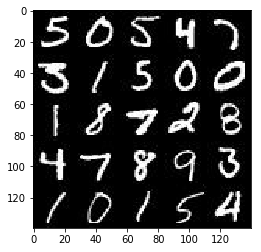

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

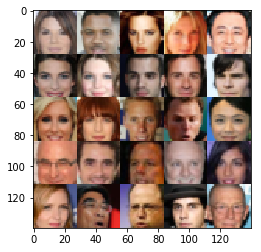

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.8.0


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:14: UserWarning: No GPU found. Please use a GPU to train your neural network.
  


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    inputs = tf.placeholder(shape=(None, image_width, image_height, image_channels),name='real_inputs',dtype=tf.float32)
    z_inputs = tf.placeholder(shape=(None, z_dim),name='z_inputs', dtype=tf.float32)
    learning_rate = tf.placeholder(name='learning_rate', dtype=tf.float32)

    return inputs, z_inputs, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    
    with tf.variable_scope('discriminator', reuse=reuse):
        
        alpha = 0.01
        
        h1 = tf.layers.conv2d(images, 64, 5, 2, 'same')
        h1 = tf.maximum(alpha * h1, h1)
        
        h2 = tf.layers.conv2d(h1, 128, 5, 2, 'same')
        h2 = tf.layers.batch_normalization(h2, training=True)
        h2 = tf.maximum(alpha * h2, h2)
        
        h3 = tf.layers.conv2d(h2, 256, 5, 2, 'same')
        h3 = tf.layers.batch_normalization(h3, training=True)
        h3 = tf.maximum(alpha * h3, h3)
        
        flat = tf.reshape(h3, (-1, 4*4*256))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
        
    return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    
    with tf.variable_scope('generator', reuse =not is_train):

        alpha = 0.01
    
        h1 = tf.layers.dense(z, 2*2*512)
        h1 = tf.reshape(h1, (-1, 2, 2, 512))
        h1 = tf.layers.batch_normalization(h1, training=is_train)
        h1 = tf.maximum(alpha * h1, h1)
    
        h2 = tf.layers.conv2d_transpose(h1, 256, 5, 2, 'valid')
        h2 = tf.layers.batch_normalization(h2, training=is_train)
        h2 = tf.maximum(alpha * h2, h2)
    
        h3 = tf.layers.conv2d_transpose(h2, 128, 5, 2, 'same')
        h3 = tf.layers.batch_normalization(h3, training=is_train)
        h3 = tf.maximum(alpha * h3, h3)
    
        logits = tf.layers.conv2d_transpose(h3, out_channel_dim, 5, 2, 'same')
        out = tf.tanh(logits)
    
        return out

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """

    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)
    
    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)))
    d_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(
        logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    
    g_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(
        logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))
    
    d_loss = d_loss_real + d_loss_fake

    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    
    d_train_opt = tf.train.AdamOptimizer(
        learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
    
    ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
    g_updates = [opt for opt in ops if opt.name.startswith('generator')]
    with tf.control_dependencies(g_updates):
        g_train_opt = tf.train.AdamOptimizer(
            learning_rate, beta1).minimize(g_loss, var_list=g_vars)
        
    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [11]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    
    
    _, img_width, img_height, img_channels = data_shape
    
    real_input, z_input, lr = model_inputs(
        img_width, img_height, img_channels, z_dim)
    
    d_loss, g_loss = model_loss(real_input, z_input, img_channels)
    d_opt, g_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    
    steps = 0
    losses = []
    n_images = 25
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                
                steps += 1
                batch_images *= 2.0
                z_sample = np.random.uniform(-1, 1, (batch_size, z_dim))
                
                _ = sess.run(d_opt, feed_dict={
                        real_input: batch_images, z_input: z_sample, lr: learning_rate})
                _ = sess.run(g_opt, feed_dict={
                        z_input: z_sample, lr: learning_rate})
                
                if steps % 10 == 0: #prints every 10 steps
                    train_loss_d = d_loss.eval({z_input: z_sample, real_input: batch_images})
                    train_loss_g = g_loss.eval({z_input: z_sample})
                    
                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    losses.append((train_loss_d, train_loss_g))
                
                if steps % 100 == 0: #show the generetor output every a hundred steps
                    show_generator_output(sess, n_images, z_input, img_channels, data_image_mode)
                
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 0.0178... Generator Loss: 7.0360
Epoch 1/2... Discriminator Loss: 0.0460... Generator Loss: 3.8375
Epoch 1/2... Discriminator Loss: 0.0180... Generator Loss: 6.1458
Epoch 1/2... Discriminator Loss: 0.3567... Generator Loss: 5.1816
Epoch 1/2... Discriminator Loss: 1.9491... Generator Loss: 3.6468
Epoch 1/2... Discriminator Loss: 0.3384... Generator Loss: 3.0848
Epoch 1/2... Discriminator Loss: 0.3790... Generator Loss: 5.7776
Epoch 1/2... Discriminator Loss: 0.2844... Generator Loss: 3.7787
Epoch 1/2... Discriminator Loss: 0.1854... Generator Loss: 4.0435
Epoch 1/2... Discriminator Loss: 1.2792... Generator Loss: 0.4759


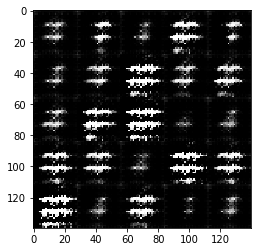

Epoch 1/2... Discriminator Loss: 2.0466... Generator Loss: 0.2896
Epoch 1/2... Discriminator Loss: 0.1197... Generator Loss: 3.7212
Epoch 1/2... Discriminator Loss: 1.5837... Generator Loss: 0.4234
Epoch 1/2... Discriminator Loss: 0.4682... Generator Loss: 3.0347
Epoch 1/2... Discriminator Loss: 1.5490... Generator Loss: 0.3493
Epoch 1/2... Discriminator Loss: 0.5346... Generator Loss: 3.8657
Epoch 1/2... Discriminator Loss: 0.3748... Generator Loss: 6.9089
Epoch 1/2... Discriminator Loss: 0.6356... Generator Loss: 1.9235
Epoch 1/2... Discriminator Loss: 0.4306... Generator Loss: 2.3825
Epoch 1/2... Discriminator Loss: 0.2848... Generator Loss: 2.4008


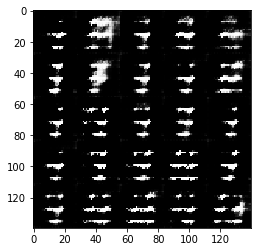

Epoch 1/2... Discriminator Loss: 1.0081... Generator Loss: 6.6620
Epoch 1/2... Discriminator Loss: 0.9793... Generator Loss: 8.3537
Epoch 1/2... Discriminator Loss: 0.4417... Generator Loss: 2.2945
Epoch 1/2... Discriminator Loss: 1.7162... Generator Loss: 0.4327
Epoch 1/2... Discriminator Loss: 0.3160... Generator Loss: 2.2925
Epoch 1/2... Discriminator Loss: 1.4758... Generator Loss: 0.7639
Epoch 1/2... Discriminator Loss: 0.6334... Generator Loss: 4.6769
Epoch 1/2... Discriminator Loss: 0.9452... Generator Loss: 1.0281
Epoch 1/2... Discriminator Loss: 1.7369... Generator Loss: 0.3640
Epoch 1/2... Discriminator Loss: 0.4559... Generator Loss: 1.9487


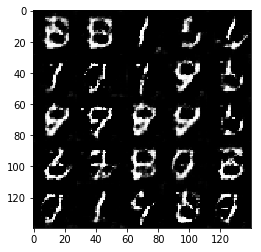

Epoch 1/2... Discriminator Loss: 0.4457... Generator Loss: 3.0478
Epoch 1/2... Discriminator Loss: 0.9245... Generator Loss: 2.4218
Epoch 1/2... Discriminator Loss: 0.9224... Generator Loss: 4.0506
Epoch 1/2... Discriminator Loss: 0.7392... Generator Loss: 2.0448
Epoch 1/2... Discriminator Loss: 1.2922... Generator Loss: 0.6689
Epoch 1/2... Discriminator Loss: 0.6137... Generator Loss: 2.2621
Epoch 1/2... Discriminator Loss: 0.6539... Generator Loss: 2.5752
Epoch 1/2... Discriminator Loss: 0.6775... Generator Loss: 2.4340
Epoch 1/2... Discriminator Loss: 0.6869... Generator Loss: 2.1016
Epoch 1/2... Discriminator Loss: 0.6708... Generator Loss: 1.9630


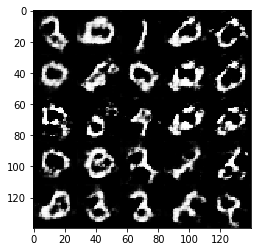

Epoch 1/2... Discriminator Loss: 1.5906... Generator Loss: 0.4114
Epoch 1/2... Discriminator Loss: 0.9209... Generator Loss: 3.1565
Epoch 1/2... Discriminator Loss: 0.6456... Generator Loss: 2.5528
Epoch 1/2... Discriminator Loss: 1.1023... Generator Loss: 0.7277
Epoch 1/2... Discriminator Loss: 0.6262... Generator Loss: 1.3586
Epoch 1/2... Discriminator Loss: 0.6729... Generator Loss: 1.7973
Epoch 2/2... Discriminator Loss: 0.9549... Generator Loss: 2.2064
Epoch 2/2... Discriminator Loss: 0.7904... Generator Loss: 0.9939
Epoch 2/2... Discriminator Loss: 0.8833... Generator Loss: 0.9240
Epoch 2/2... Discriminator Loss: 0.8008... Generator Loss: 1.3380


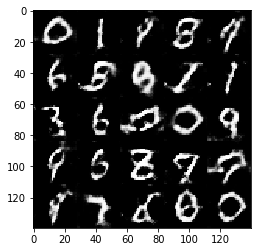

Epoch 2/2... Discriminator Loss: 0.8651... Generator Loss: 1.2199
Epoch 2/2... Discriminator Loss: 0.7772... Generator Loss: 1.2171
Epoch 2/2... Discriminator Loss: 0.8078... Generator Loss: 1.2826
Epoch 2/2... Discriminator Loss: 1.0824... Generator Loss: 0.7457
Epoch 2/2... Discriminator Loss: 1.0381... Generator Loss: 2.5398
Epoch 2/2... Discriminator Loss: 0.7483... Generator Loss: 1.1084
Epoch 2/2... Discriminator Loss: 0.8128... Generator Loss: 2.1304
Epoch 2/2... Discriminator Loss: 0.8799... Generator Loss: 1.1015
Epoch 2/2... Discriminator Loss: 0.7982... Generator Loss: 1.1956
Epoch 2/2... Discriminator Loss: 0.9540... Generator Loss: 0.7678


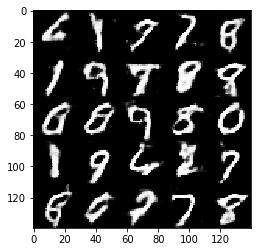

Epoch 2/2... Discriminator Loss: 2.2025... Generator Loss: 0.2056
Epoch 2/2... Discriminator Loss: 0.9423... Generator Loss: 0.7731
Epoch 2/2... Discriminator Loss: 0.6908... Generator Loss: 1.5529
Epoch 2/2... Discriminator Loss: 0.8216... Generator Loss: 1.3257
Epoch 2/2... Discriminator Loss: 0.8189... Generator Loss: 1.1261
Epoch 2/2... Discriminator Loss: 1.1380... Generator Loss: 2.2388
Epoch 2/2... Discriminator Loss: 1.2512... Generator Loss: 0.5154
Epoch 2/2... Discriminator Loss: 0.9446... Generator Loss: 1.1773
Epoch 2/2... Discriminator Loss: 1.0737... Generator Loss: 2.1070
Epoch 2/2... Discriminator Loss: 1.1241... Generator Loss: 2.6723


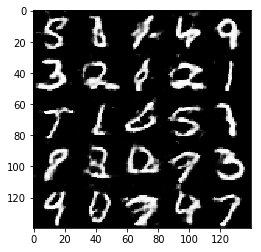

Epoch 2/2... Discriminator Loss: 0.9594... Generator Loss: 1.1481
Epoch 2/2... Discriminator Loss: 0.9570... Generator Loss: 0.9400
Epoch 2/2... Discriminator Loss: 1.0471... Generator Loss: 0.8873
Epoch 2/2... Discriminator Loss: 1.0096... Generator Loss: 0.8850
Epoch 2/2... Discriminator Loss: 1.0881... Generator Loss: 0.7868
Epoch 2/2... Discriminator Loss: 1.3877... Generator Loss: 0.4303
Epoch 2/2... Discriminator Loss: 1.3549... Generator Loss: 0.4559
Epoch 2/2... Discriminator Loss: 1.0677... Generator Loss: 0.7687
Epoch 2/2... Discriminator Loss: 0.9613... Generator Loss: 1.5332
Epoch 2/2... Discriminator Loss: 2.3088... Generator Loss: 0.1757


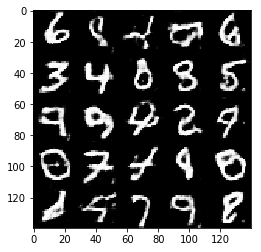

Epoch 2/2... Discriminator Loss: 0.9813... Generator Loss: 1.1780
Epoch 2/2... Discriminator Loss: 1.0119... Generator Loss: 0.7914
Epoch 2/2... Discriminator Loss: 0.9869... Generator Loss: 0.9134
Epoch 2/2... Discriminator Loss: 0.9968... Generator Loss: 1.0913
Epoch 2/2... Discriminator Loss: 0.8903... Generator Loss: 1.4022
Epoch 2/2... Discriminator Loss: 0.9529... Generator Loss: 1.0637
Epoch 2/2... Discriminator Loss: 1.7530... Generator Loss: 0.2756
Epoch 2/2... Discriminator Loss: 1.2024... Generator Loss: 0.5748
Epoch 2/2... Discriminator Loss: 1.0186... Generator Loss: 1.3380
Epoch 2/2... Discriminator Loss: 1.1970... Generator Loss: 1.7554


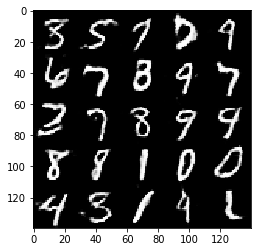

Epoch 2/2... Discriminator Loss: 1.3020... Generator Loss: 0.5437
Epoch 2/2... Discriminator Loss: 2.1455... Generator Loss: 3.3876
Epoch 2/2... Discriminator Loss: 0.9335... Generator Loss: 1.0065


In [12]:
batch_size = 128
z_dim = 128
learning_rate = 0.0025
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 2.1076... Generator Loss: 12.7245
Epoch 1/1... Discriminator Loss: 1.2719... Generator Loss: 0.3861
Epoch 1/1... Discriminator Loss: 0.8172... Generator Loss: 8.0193
Epoch 1/1... Discriminator Loss: 0.6608... Generator Loss: 4.6903
Epoch 1/1... Discriminator Loss: 0.9948... Generator Loss: 3.8695
Epoch 1/1... Discriminator Loss: 0.3069... Generator Loss: 2.9816
Epoch 1/1... Discriminator Loss: 0.9132... Generator Loss: 2.8476
Epoch 1/1... Discriminator Loss: 1.1916... Generator Loss: 4.2878
Epoch 1/1... Discriminator Loss: 0.4910... Generator Loss: 1.9921
Epoch 1/1... Discriminator Loss: 1.5308... Generator Loss: 2.8489


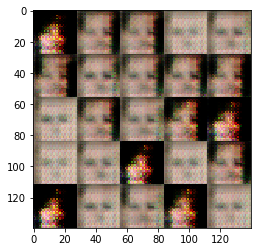

Epoch 1/1... Discriminator Loss: 1.9357... Generator Loss: 0.3547
Epoch 1/1... Discriminator Loss: 0.6829... Generator Loss: 2.5252
Epoch 1/1... Discriminator Loss: 0.3802... Generator Loss: 1.6183
Epoch 1/1... Discriminator Loss: 0.2623... Generator Loss: 1.8861
Epoch 1/1... Discriminator Loss: 0.0510... Generator Loss: 5.2852
Epoch 1/1... Discriminator Loss: 0.0928... Generator Loss: 4.6780
Epoch 1/1... Discriminator Loss: 0.0381... Generator Loss: 4.0145
Epoch 1/1... Discriminator Loss: 1.4364... Generator Loss: 0.7885
Epoch 1/1... Discriminator Loss: 1.1649... Generator Loss: 1.3061
Epoch 1/1... Discriminator Loss: 0.9130... Generator Loss: 1.9336


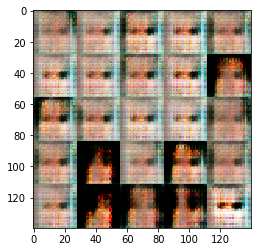

Epoch 1/1... Discriminator Loss: 0.8098... Generator Loss: 0.7718
Epoch 1/1... Discriminator Loss: 1.0187... Generator Loss: 1.1587
Epoch 1/1... Discriminator Loss: 1.0558... Generator Loss: 0.5922
Epoch 1/1... Discriminator Loss: 0.9671... Generator Loss: 0.8464
Epoch 1/1... Discriminator Loss: 1.5823... Generator Loss: 4.9957
Epoch 1/1... Discriminator Loss: 1.0253... Generator Loss: 3.3480
Epoch 1/1... Discriminator Loss: 1.0129... Generator Loss: 1.6751
Epoch 1/1... Discriminator Loss: 1.1544... Generator Loss: 1.7297
Epoch 1/1... Discriminator Loss: 0.8837... Generator Loss: 0.9382
Epoch 1/1... Discriminator Loss: 0.5687... Generator Loss: 1.9931


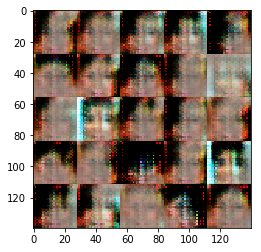

Epoch 1/1... Discriminator Loss: 1.5685... Generator Loss: 0.4250
Epoch 1/1... Discriminator Loss: 0.7963... Generator Loss: 1.0210
Epoch 1/1... Discriminator Loss: 1.2708... Generator Loss: 3.9788
Epoch 1/1... Discriminator Loss: 1.3225... Generator Loss: 0.7626
Epoch 1/1... Discriminator Loss: 1.0657... Generator Loss: 1.1189
Epoch 1/1... Discriminator Loss: 1.4401... Generator Loss: 1.4962
Epoch 1/1... Discriminator Loss: 1.0280... Generator Loss: 1.0831
Epoch 1/1... Discriminator Loss: 0.9699... Generator Loss: 1.9827
Epoch 1/1... Discriminator Loss: 1.1485... Generator Loss: 0.6252
Epoch 1/1... Discriminator Loss: 0.9341... Generator Loss: 1.1444


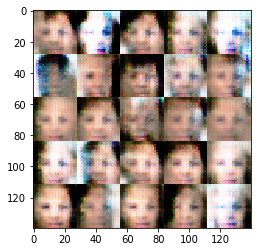

Epoch 1/1... Discriminator Loss: 0.9207... Generator Loss: 2.0683
Epoch 1/1... Discriminator Loss: 1.0849... Generator Loss: 0.6236
Epoch 1/1... Discriminator Loss: 0.8069... Generator Loss: 1.0234
Epoch 1/1... Discriminator Loss: 1.5932... Generator Loss: 1.9585
Epoch 1/1... Discriminator Loss: 0.8888... Generator Loss: 1.5345
Epoch 1/1... Discriminator Loss: 0.8379... Generator Loss: 1.3679
Epoch 1/1... Discriminator Loss: 1.2715... Generator Loss: 0.5690
Epoch 1/1... Discriminator Loss: 0.7205... Generator Loss: 1.6224
Epoch 1/1... Discriminator Loss: 1.0001... Generator Loss: 0.6878
Epoch 1/1... Discriminator Loss: 0.8479... Generator Loss: 1.3655


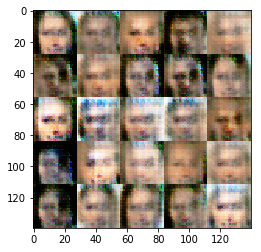

Epoch 1/1... Discriminator Loss: 0.9658... Generator Loss: 1.3713
Epoch 1/1... Discriminator Loss: 0.9278... Generator Loss: 1.0789
Epoch 1/1... Discriminator Loss: 1.0650... Generator Loss: 0.9581
Epoch 1/1... Discriminator Loss: 1.1963... Generator Loss: 0.6145
Epoch 1/1... Discriminator Loss: 1.3806... Generator Loss: 0.4432
Epoch 1/1... Discriminator Loss: 1.3988... Generator Loss: 0.4033
Epoch 1/1... Discriminator Loss: 0.8953... Generator Loss: 0.8318
Epoch 1/1... Discriminator Loss: 3.1485... Generator Loss: 6.2087
Epoch 1/1... Discriminator Loss: 1.2487... Generator Loss: 3.3275
Epoch 1/1... Discriminator Loss: 1.7526... Generator Loss: 0.2666


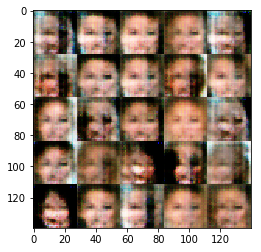

Epoch 1/1... Discriminator Loss: 1.1913... Generator Loss: 0.6460
Epoch 1/1... Discriminator Loss: 0.8511... Generator Loss: 0.9779
Epoch 1/1... Discriminator Loss: 1.1555... Generator Loss: 0.5841
Epoch 1/1... Discriminator Loss: 0.7118... Generator Loss: 1.8111
Epoch 1/1... Discriminator Loss: 1.3045... Generator Loss: 0.4851
Epoch 1/1... Discriminator Loss: 1.4261... Generator Loss: 3.8726
Epoch 1/1... Discriminator Loss: 0.8763... Generator Loss: 1.3916
Epoch 1/1... Discriminator Loss: 1.6833... Generator Loss: 0.3407
Epoch 1/1... Discriminator Loss: 0.6578... Generator Loss: 1.2259
Epoch 1/1... Discriminator Loss: 1.0164... Generator Loss: 0.7633


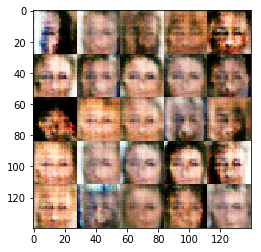

Epoch 1/1... Discriminator Loss: 1.2713... Generator Loss: 0.8193
Epoch 1/1... Discriminator Loss: 0.9984... Generator Loss: 0.7426
Epoch 1/1... Discriminator Loss: 1.2401... Generator Loss: 0.9209
Epoch 1/1... Discriminator Loss: 0.9201... Generator Loss: 1.0216
Epoch 1/1... Discriminator Loss: 1.0270... Generator Loss: 1.1550
Epoch 1/1... Discriminator Loss: 0.7857... Generator Loss: 1.5189
Epoch 1/1... Discriminator Loss: 0.6730... Generator Loss: 2.3583
Epoch 1/1... Discriminator Loss: 0.9650... Generator Loss: 0.9485
Epoch 1/1... Discriminator Loss: 1.3285... Generator Loss: 0.5554
Epoch 1/1... Discriminator Loss: 0.5269... Generator Loss: 1.1369


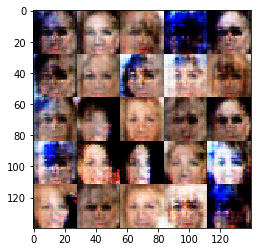

Epoch 1/1... Discriminator Loss: 0.8949... Generator Loss: 1.4736
Epoch 1/1... Discriminator Loss: 0.5985... Generator Loss: 1.7640
Epoch 1/1... Discriminator Loss: 0.8176... Generator Loss: 0.8929
Epoch 1/1... Discriminator Loss: 0.8990... Generator Loss: 0.9691
Epoch 1/1... Discriminator Loss: 0.3851... Generator Loss: 1.2783
Epoch 1/1... Discriminator Loss: 1.5079... Generator Loss: 1.7237
Epoch 1/1... Discriminator Loss: 0.7380... Generator Loss: 1.2311
Epoch 1/1... Discriminator Loss: 0.7672... Generator Loss: 0.8956
Epoch 1/1... Discriminator Loss: 0.9635... Generator Loss: 0.6234
Epoch 1/1... Discriminator Loss: 1.2098... Generator Loss: 2.7447


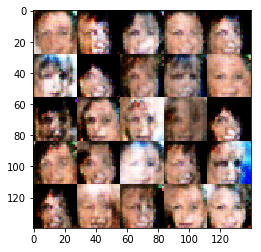

Epoch 1/1... Discriminator Loss: 0.7914... Generator Loss: 1.1365
Epoch 1/1... Discriminator Loss: 0.8147... Generator Loss: 1.7974
Epoch 1/1... Discriminator Loss: 0.8418... Generator Loss: 0.7471
Epoch 1/1... Discriminator Loss: 0.7003... Generator Loss: 1.3936
Epoch 1/1... Discriminator Loss: 0.7092... Generator Loss: 0.8660
Epoch 1/1... Discriminator Loss: 0.5427... Generator Loss: 1.1025
Epoch 1/1... Discriminator Loss: 1.1684... Generator Loss: 0.9314
Epoch 1/1... Discriminator Loss: 0.3081... Generator Loss: 2.4547
Epoch 1/1... Discriminator Loss: 0.9691... Generator Loss: 0.7411
Epoch 1/1... Discriminator Loss: 0.9987... Generator Loss: 2.0547


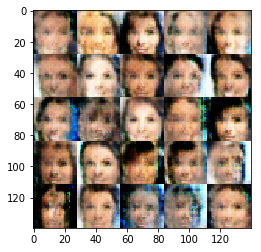

Epoch 1/1... Discriminator Loss: 0.5850... Generator Loss: 1.1236
Epoch 1/1... Discriminator Loss: 1.7385... Generator Loss: 3.7124
Epoch 1/1... Discriminator Loss: 1.3229... Generator Loss: 2.5972
Epoch 1/1... Discriminator Loss: 0.9677... Generator Loss: 2.0593
Epoch 1/1... Discriminator Loss: 1.2913... Generator Loss: 2.1583
Epoch 1/1... Discriminator Loss: 0.7968... Generator Loss: 0.8903
Epoch 1/1... Discriminator Loss: 0.5007... Generator Loss: 1.6324
Epoch 1/1... Discriminator Loss: 1.1204... Generator Loss: 0.5466
Epoch 1/1... Discriminator Loss: 1.3239... Generator Loss: 0.5927
Epoch 1/1... Discriminator Loss: 1.4628... Generator Loss: 2.8359


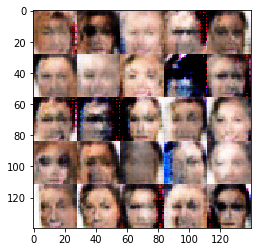

Epoch 1/1... Discriminator Loss: 1.4149... Generator Loss: 0.4727
Epoch 1/1... Discriminator Loss: 0.7664... Generator Loss: 0.9168
Epoch 1/1... Discriminator Loss: 1.0052... Generator Loss: 1.0509
Epoch 1/1... Discriminator Loss: 1.1147... Generator Loss: 2.6482
Epoch 1/1... Discriminator Loss: 3.3408... Generator Loss: 0.1238
Epoch 1/1... Discriminator Loss: 1.0064... Generator Loss: 1.5274
Epoch 1/1... Discriminator Loss: 0.6598... Generator Loss: 1.8248
Epoch 1/1... Discriminator Loss: 1.4137... Generator Loss: 0.4784
Epoch 1/1... Discriminator Loss: 0.9573... Generator Loss: 0.8096
Epoch 1/1... Discriminator Loss: 0.9827... Generator Loss: 1.2859


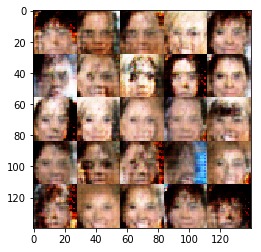

Epoch 1/1... Discriminator Loss: 0.6500... Generator Loss: 1.6667
Epoch 1/1... Discriminator Loss: 0.5077... Generator Loss: 1.6030
Epoch 1/1... Discriminator Loss: 1.1696... Generator Loss: 1.4792
Epoch 1/1... Discriminator Loss: 0.7645... Generator Loss: 0.8586
Epoch 1/1... Discriminator Loss: 0.6192... Generator Loss: 1.0973
Epoch 1/1... Discriminator Loss: 1.2255... Generator Loss: 0.5800
Epoch 1/1... Discriminator Loss: 1.2107... Generator Loss: 2.3756
Epoch 1/1... Discriminator Loss: 1.1649... Generator Loss: 2.5776
Epoch 1/1... Discriminator Loss: 0.8676... Generator Loss: 2.0089
Epoch 1/1... Discriminator Loss: 1.5183... Generator Loss: 0.4576


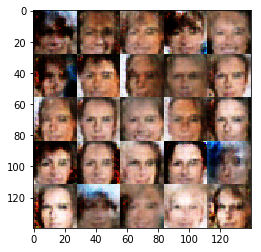

Epoch 1/1... Discriminator Loss: 0.8778... Generator Loss: 1.4044
Epoch 1/1... Discriminator Loss: 0.7406... Generator Loss: 1.1747
Epoch 1/1... Discriminator Loss: 0.8220... Generator Loss: 1.0438
Epoch 1/1... Discriminator Loss: 0.7496... Generator Loss: 1.2085
Epoch 1/1... Discriminator Loss: 0.9708... Generator Loss: 0.7258
Epoch 1/1... Discriminator Loss: 2.3650... Generator Loss: 4.8683
Epoch 1/1... Discriminator Loss: 2.0640... Generator Loss: 2.9230
Epoch 1/1... Discriminator Loss: 0.8332... Generator Loss: 1.4321
Epoch 1/1... Discriminator Loss: 1.4268... Generator Loss: 0.4713
Epoch 1/1... Discriminator Loss: 0.8306... Generator Loss: 1.0045


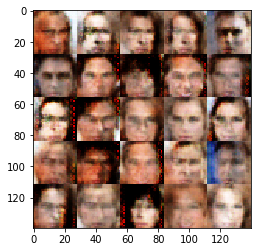

Epoch 1/1... Discriminator Loss: 0.8363... Generator Loss: 1.4479
Epoch 1/1... Discriminator Loss: 0.8560... Generator Loss: 1.3996
Epoch 1/1... Discriminator Loss: 0.8125... Generator Loss: 1.7265
Epoch 1/1... Discriminator Loss: 0.7877... Generator Loss: 1.9760
Epoch 1/1... Discriminator Loss: 0.9251... Generator Loss: 0.6216
Epoch 1/1... Discriminator Loss: 1.5052... Generator Loss: 0.7732
Epoch 1/1... Discriminator Loss: 1.0570... Generator Loss: 0.9403
Epoch 1/1... Discriminator Loss: 0.7977... Generator Loss: 1.1134
Epoch 1/1... Discriminator Loss: 0.5252... Generator Loss: 1.2222
Epoch 1/1... Discriminator Loss: 1.2027... Generator Loss: 0.9442


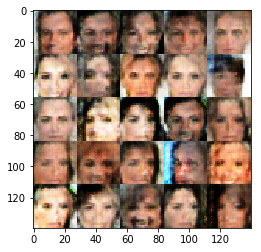

Epoch 1/1... Discriminator Loss: 0.9851... Generator Loss: 0.9339
Epoch 1/1... Discriminator Loss: 1.3532... Generator Loss: 0.6151
Epoch 1/1... Discriminator Loss: 1.2193... Generator Loss: 0.7641
Epoch 1/1... Discriminator Loss: 0.8238... Generator Loss: 0.9330
Epoch 1/1... Discriminator Loss: 1.6451... Generator Loss: 0.3332
Epoch 1/1... Discriminator Loss: 0.9819... Generator Loss: 1.6620
Epoch 1/1... Discriminator Loss: 0.7316... Generator Loss: 1.4960
Epoch 1/1... Discriminator Loss: 0.9186... Generator Loss: 0.7941


In [14]:
batch_size = 128
z_dim = 100
learning_rate = 0.0025
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.